## Machine Learning Workflow Overview 📋

Here is the typical workflow we'll follow for building model pipelines:

1. Import Packages 📦
2. Load Data 📊
3. Define Target and Features 🎯
4. Perform a Train-Test Split ✂️
5. Create a ColumnTransformer for Preprocessing 🔄
6. Create a Model Pipeline 🧩
7. Build and Fit the Model Pipeline on the Training Data and Make Predictions 🚂
8. Evaluate the Model 🏅
9. Fine tune the Model 🛠
10. Summary 📝

### 1. Import Packages 📦

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import missingno as mn

#preprocesssing libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn import set_config
set_config(display='diagram')

#settings display option for pandas
pd.set_option('display.max_columns', 100)

### 2. Load Data 📊

In [2]:
file = 'data/fish_regression.csv'

df = pd.read_csv(file)

df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


2.1 🔍 Data Exploration:
   - 📈 Number of records (rows)
   - 📊 Number of features (columns)
   - 🔢 Data types of each feature (string/integer/etc.)
   - 📌 Meaning of each feature in relation to stakeholder goals

In [3]:
num_rows = df.shape[0]
print(f'Number of records (rows): {num_rows}')

num_cols = df.shape[1]
print(f'Number of features (cols): {num_cols}')

print(f'\nData type of each feature\n{df.dtypes}')

Number of records (rows): 159
Number of features (cols): 7

Data type of each feature
Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object


2.2🔍 Data Quality Assessment
- 🗃 Duplicate rows check
- 🕳 Missing values identification
- 🔄 Inconsistent values detection (e.g., "yes" vs. "Yes")
- ⚙️ Feature combination/separation needs

In [4]:
#check for duplis
duplicates = df.duplicated().sum()
print(f'Duplicated Rows: {duplicates}')

mis_vals = df.isna().sum()
print(f'\nThese are the missing values: \n{mis_vals}')

stats = df.describe()
print(f'\nData Statistics: \n{stats}')

Duplicated Rows: 0

These are the missing values: 
Species    4
Weight     0
Length1    2
Length2    2
Length3    9
Height     3
Width      2
dtype: int64

Data Statistics: 
            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  157.000000  157.000000  150.000000  156.000000  157.000000
mean    398.326415   26.080255   28.168153   31.196000    8.907132    4.416820
std     357.978317    9.939357   10.407117   11.071718    4.250476    1.695044
min       0.000000    7.500000    8.400000   10.800000    1.728400    1.047600
25%     120.000000   19.000000   21.000000   23.275000    5.949000    3.375600
50%     273.000000   25.000000   27.000000   29.700000    7.733000    4.248500
75%     650.000000   32.500000   35.000000   39.575000   12.038100    5.589000
max    1650.000000   59.000000   60.000000   64.000000   18.957000    8.142000


<Axes: >

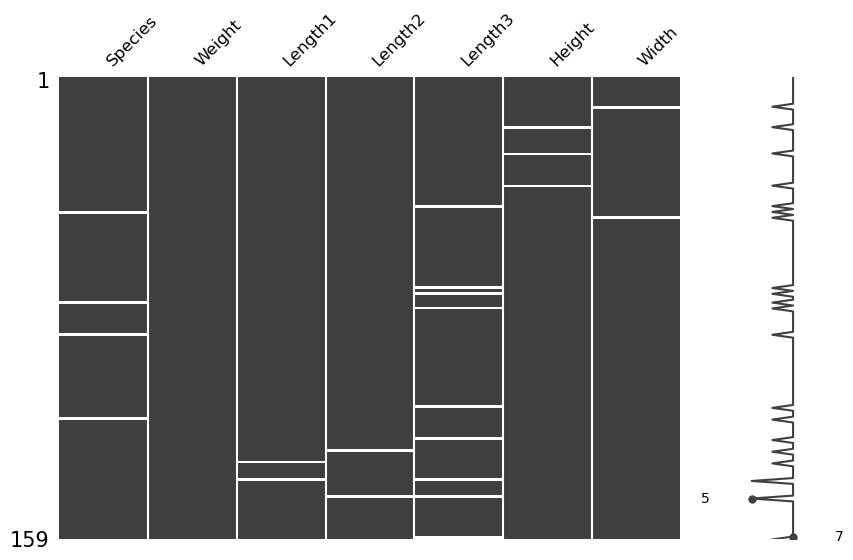

In [5]:
#visualize missing values
mn.matrix(df, figsize=(10, 6), width_ratios=(5,1), fontsize=12)

2.3 📊 Feature Exploration
- 🕵️ Detailed exploration of each feature
- 📉 Visualizations to identify relationships between features

                                             |          | [  0%]   00:00 -> (? left)

Report analyze. html was generated.



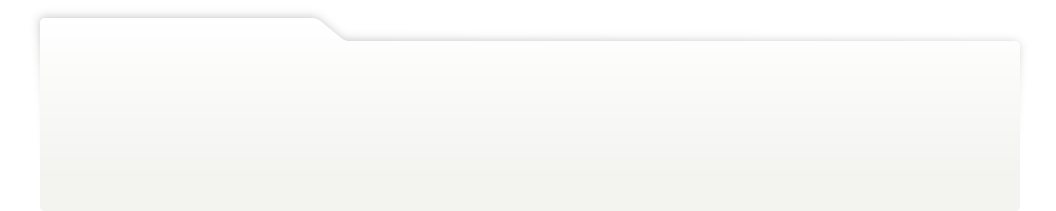
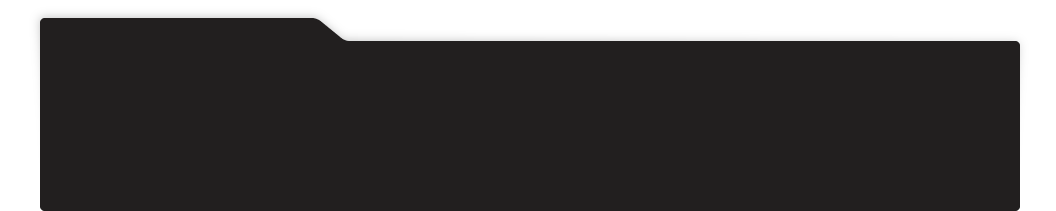
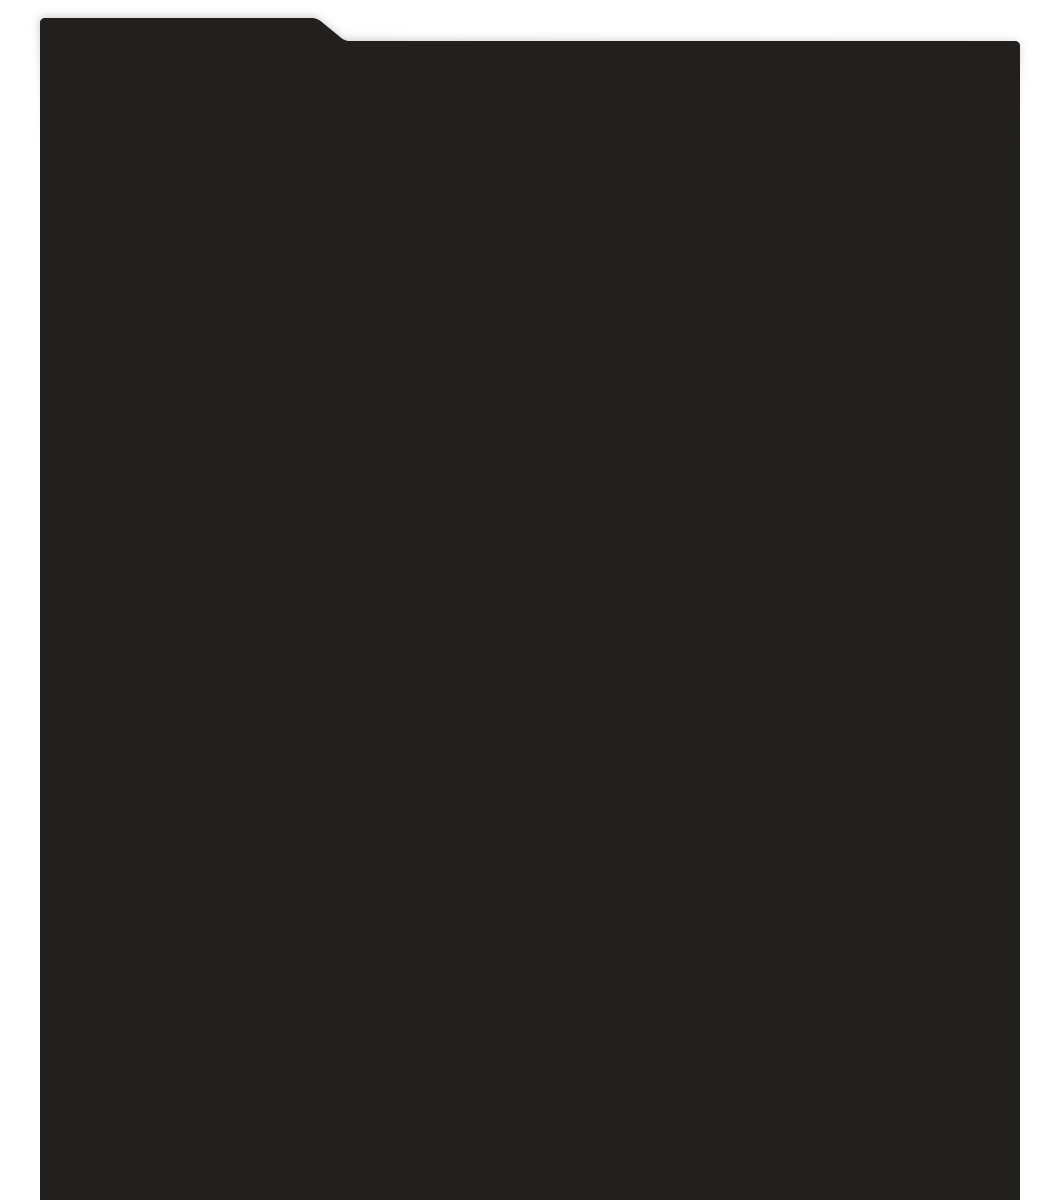
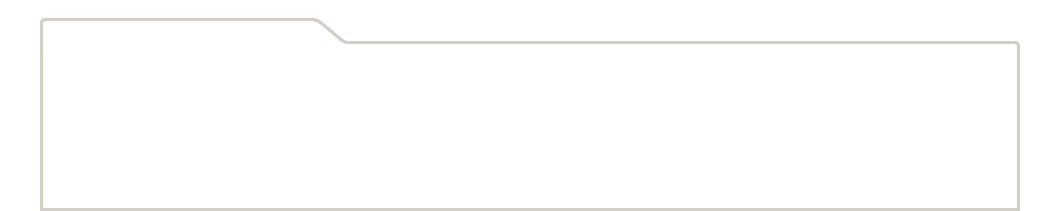
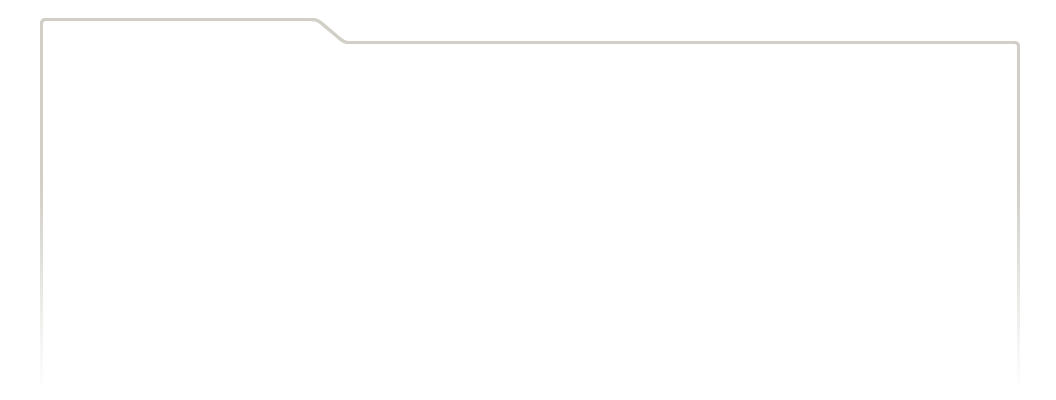
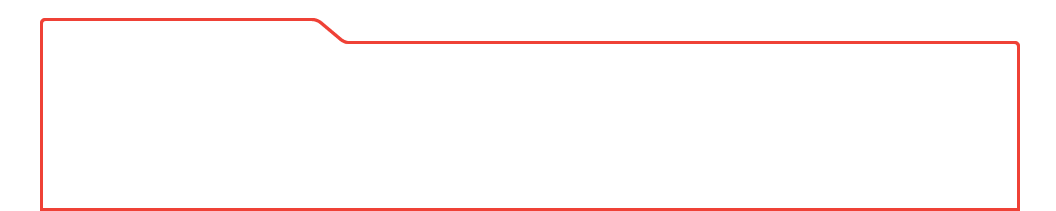
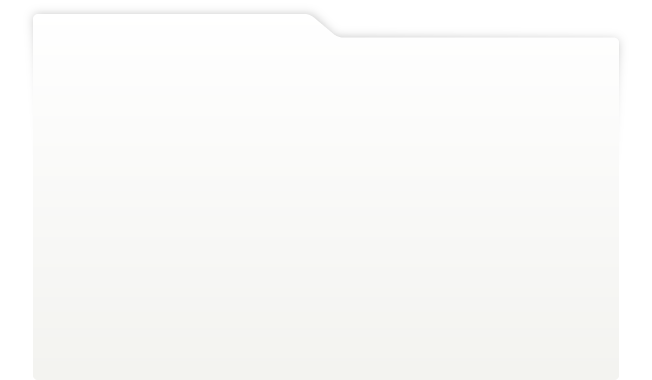
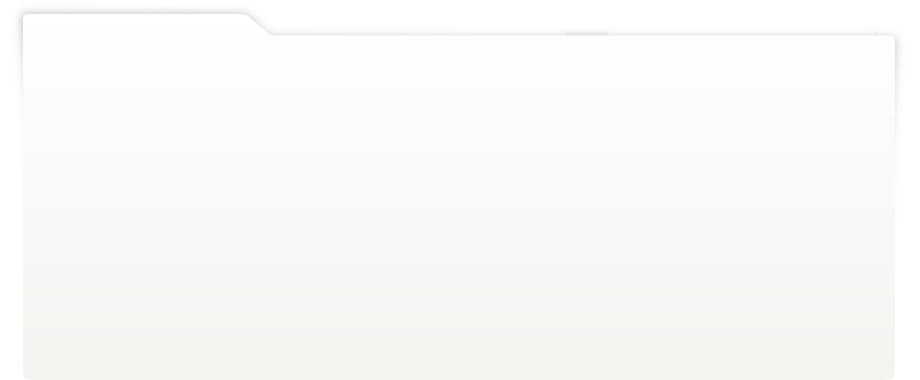
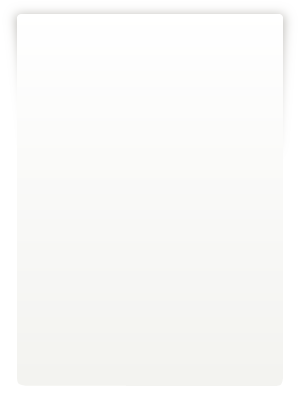
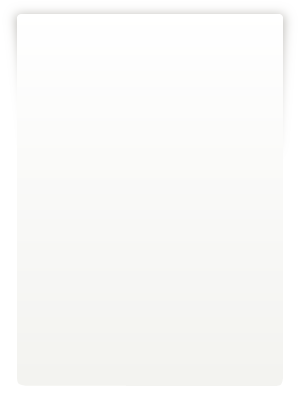
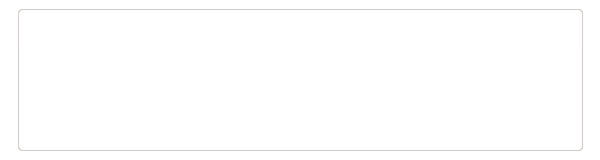
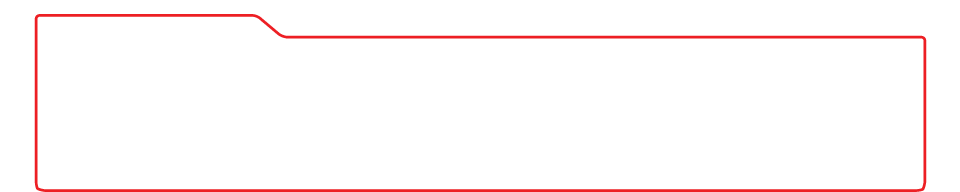
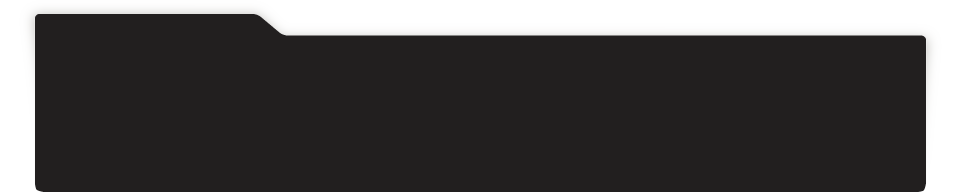
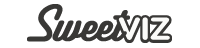
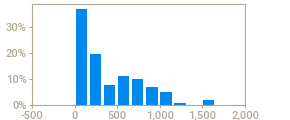
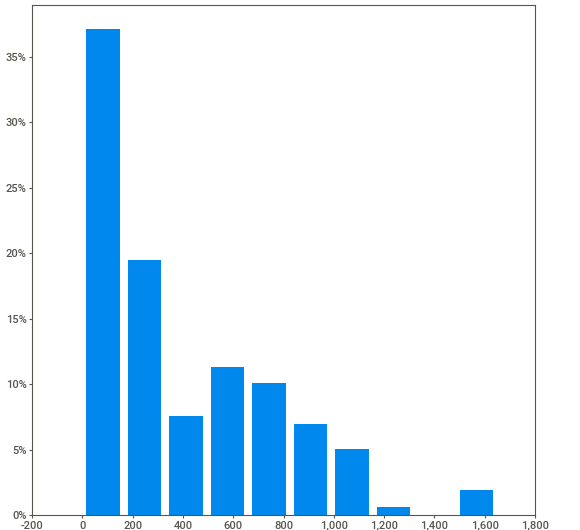
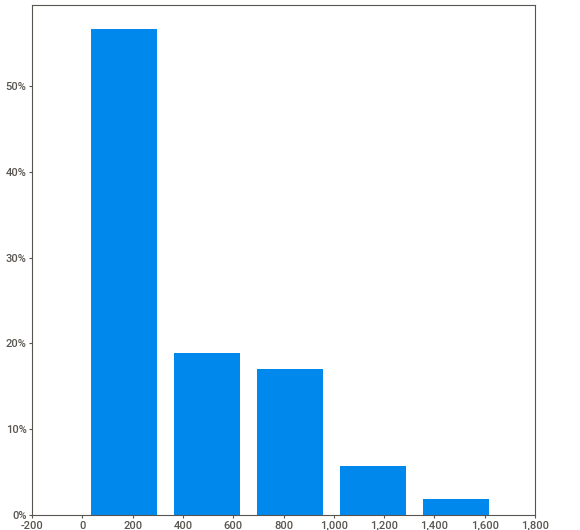
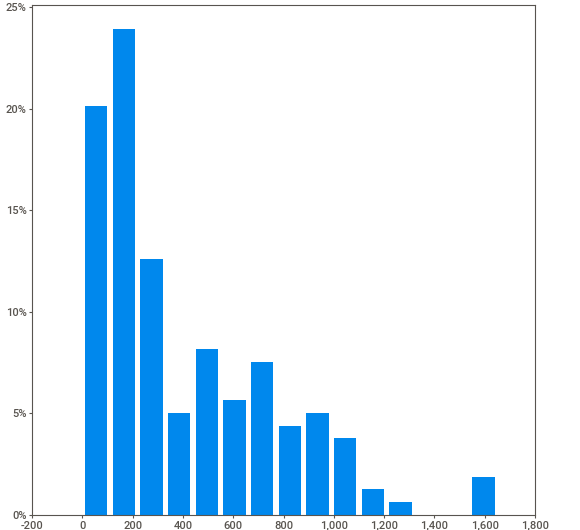
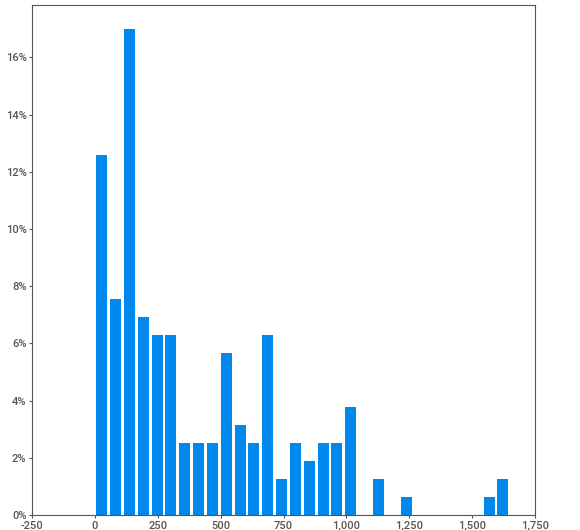
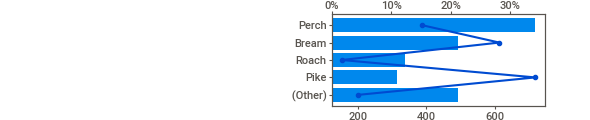
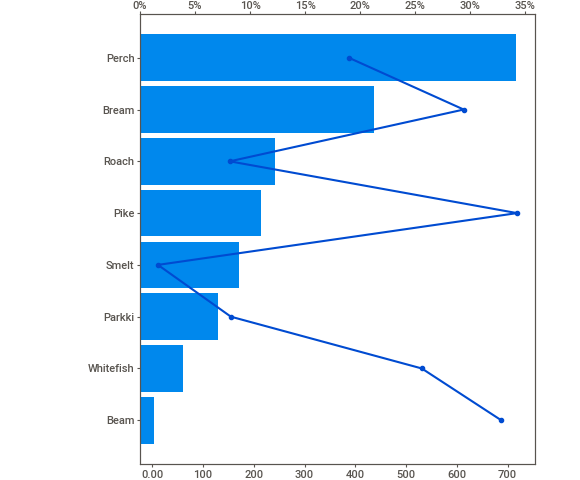
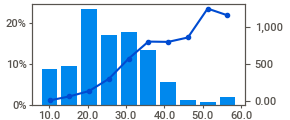
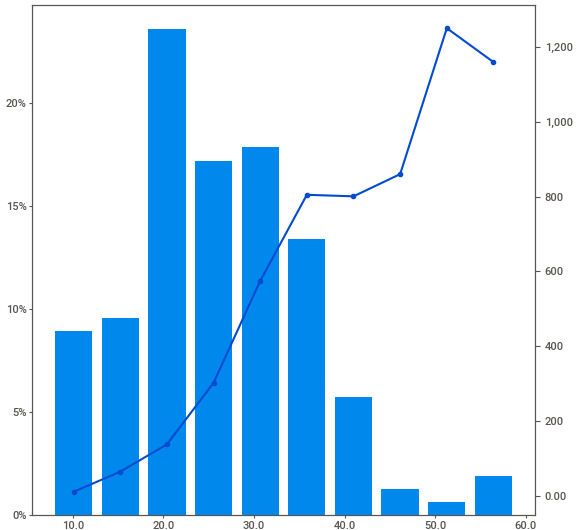
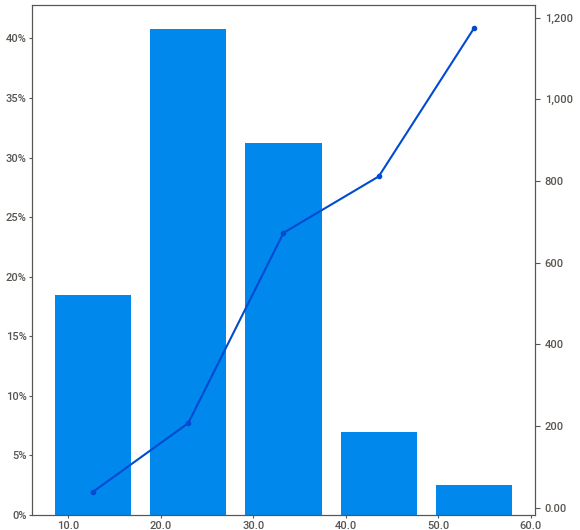
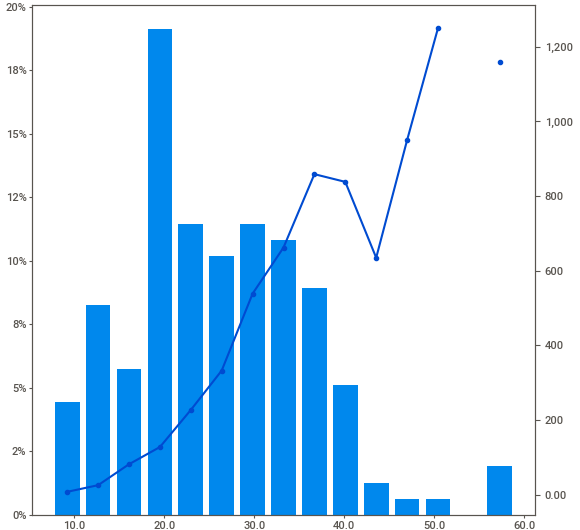
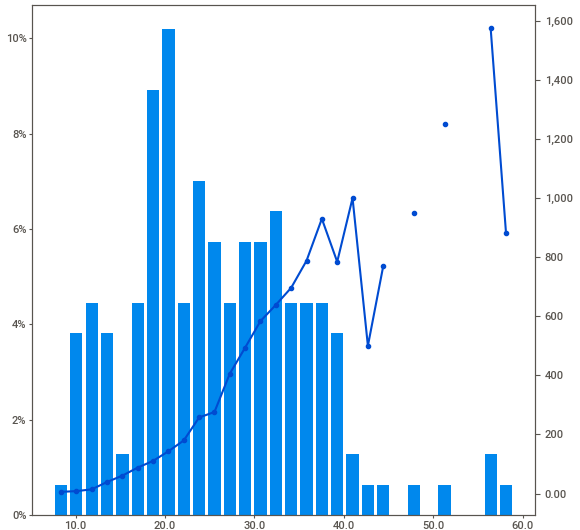
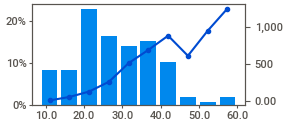
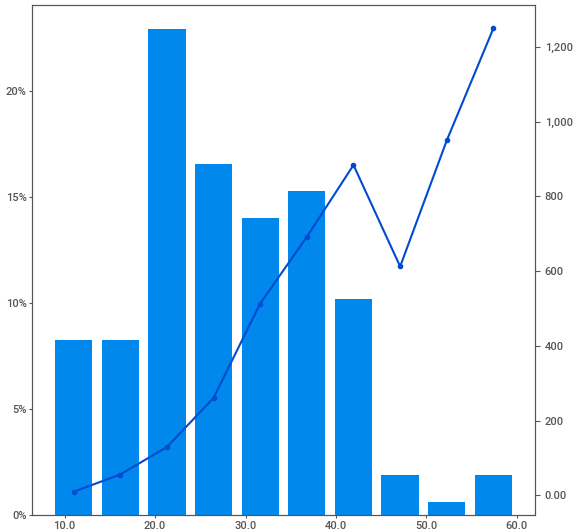
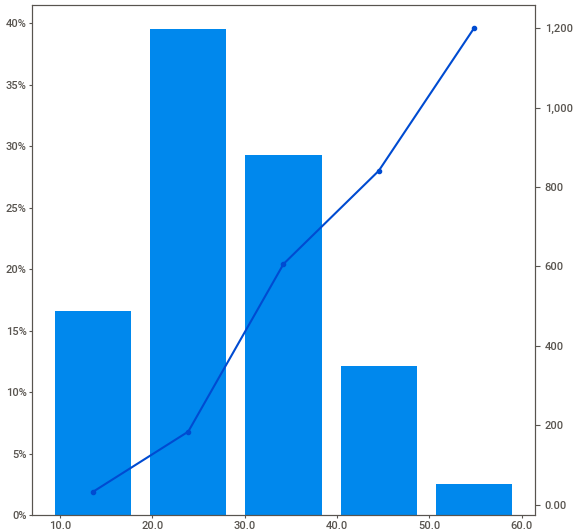
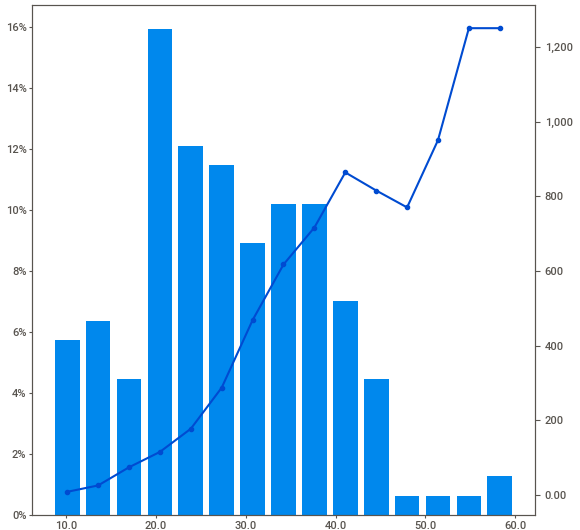
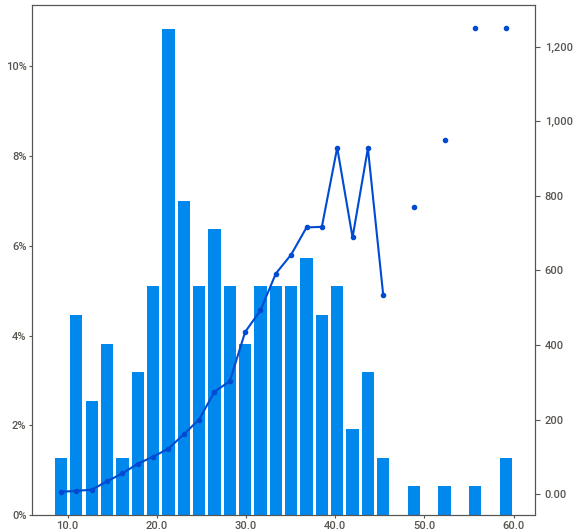
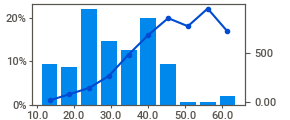
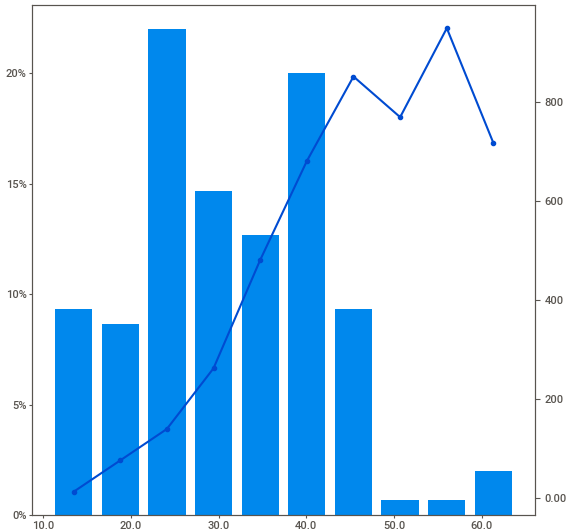
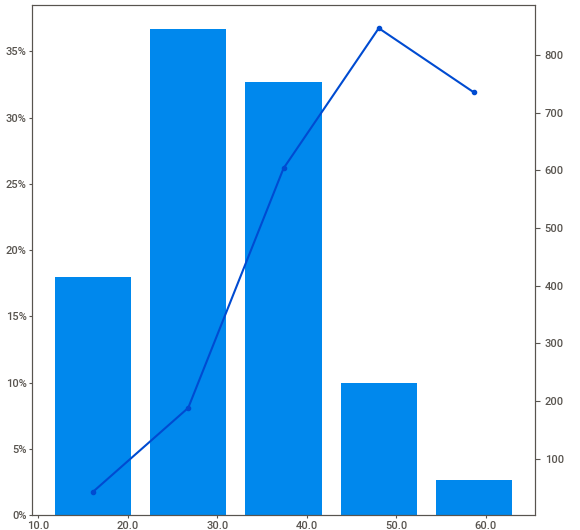
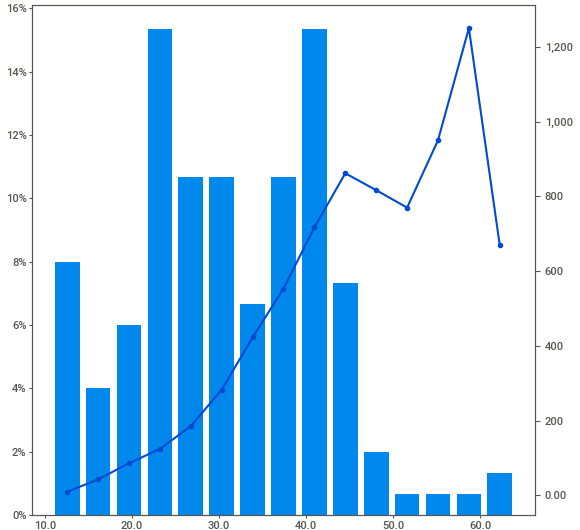
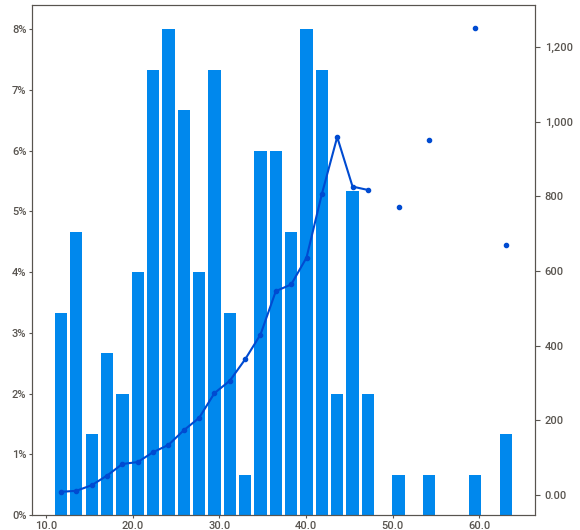
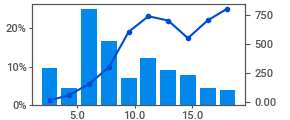
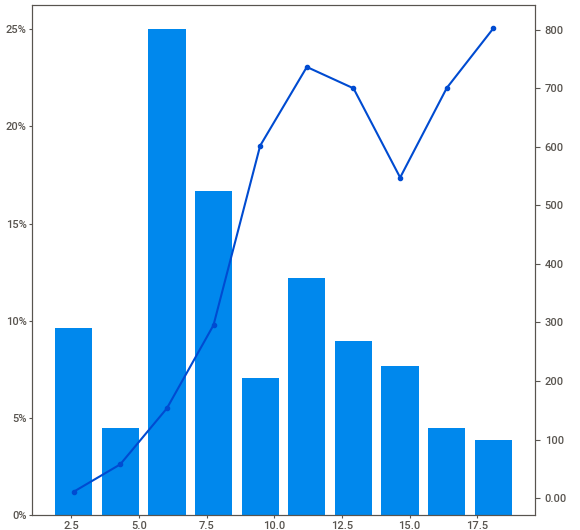
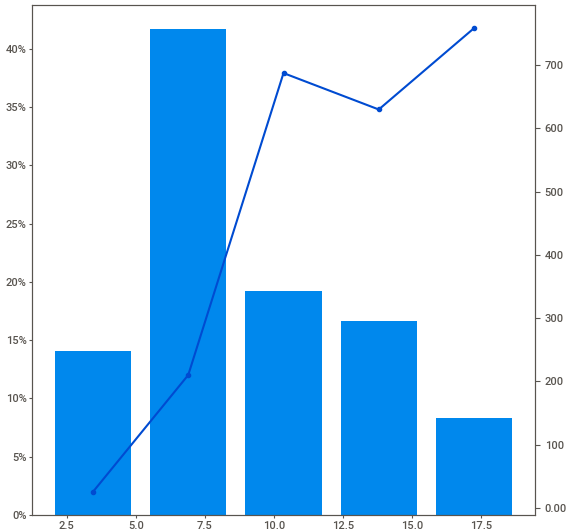
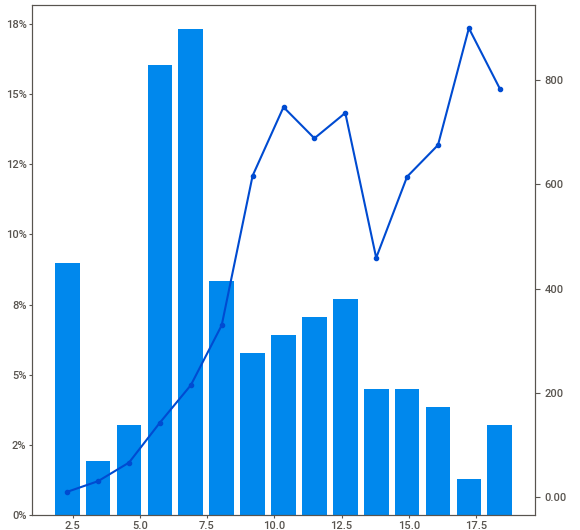
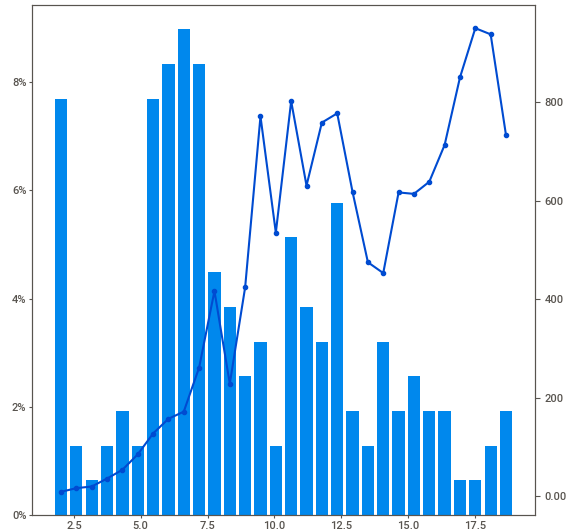
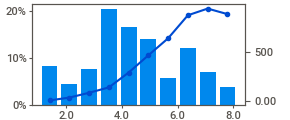
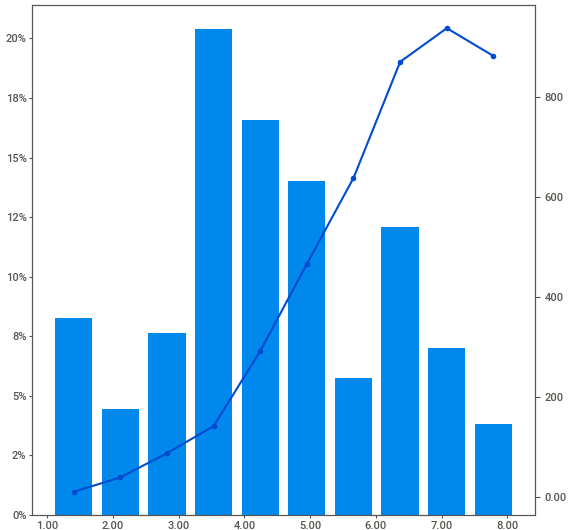
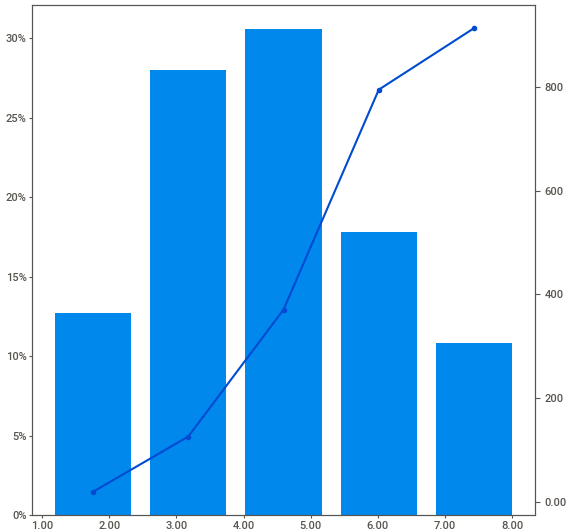
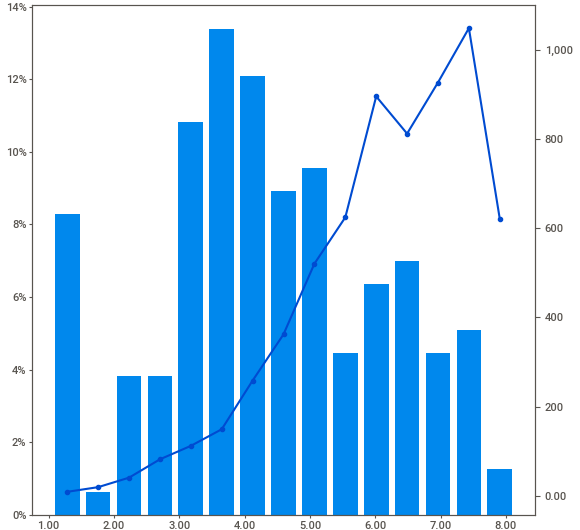
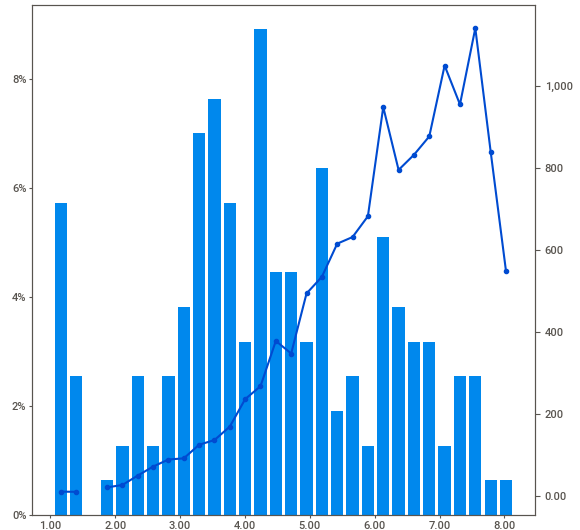
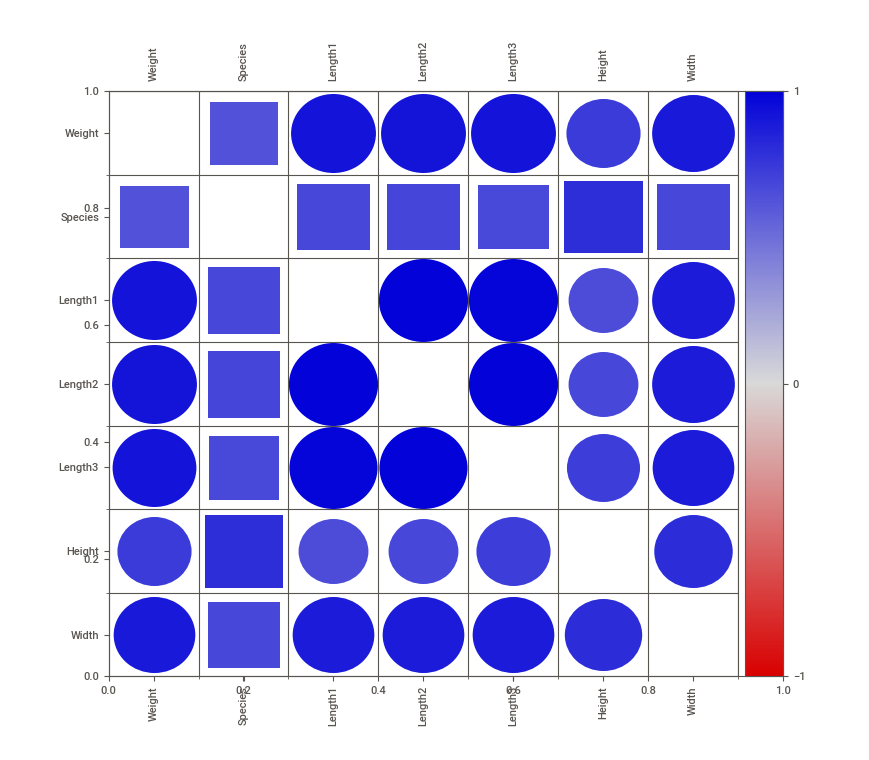
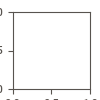

In [6]:
import sweetviz as sv

#visualize an overview of the dataset\
report = sv.analyze(df, target_feat='Weight')
report.show_html('analyze. html', open_browser=False)

#show report
report.show_notebook(layout='widescreen', w=1500, h=700, scale=0.8)

In [7]:
#create a copy of dataframe for visualization
df_copy = df.copy()

#select categorical columns 
cat_selector = make_column_selector(dtype_include='object')
cat_data = df_copy[cat_selector(df_copy)]

#iterate through each categorical column 
for col_name in cat_data.columns:
    # print column name
    print(col_name)

    #create dictionary to map each unique value  to an index
    col_dictionary = {value: index for index, value in enumerate(df_copy[col_name].unique())}

    #replace values in the column with their corresponding index 
    df_copy[col_name] = df_copy[col_name].replace(col_dictionary)

Species


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8768\1016201567.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy[col_name] = df_copy[col_name].replace(col_dictionary)


In [8]:
#create correlation matrix to identify relationships between features
corr = df_copy.corr()
corr.style.background_gradient(cmap='coolwarm').format('{:2f}')

,Species,Weight,Length1,Length2,Length3,Height,Width
Species,1.000000,-0.187763,-0.126783,-0.154356,-0.254496,-0.702262,-0.302563
Weight,-0.187763,1.000000,0.921829,0.915172,0.919473,0.720593,0.886639
Length1,-0.126783,0.921829,1.000000,0.999484,0.991126,0.637995,0.874223
Length2,-0.154356,0.915172,0.999484,1.000000,0.993411,0.656952,0.877830
Length3,-0.254496,0.919473,0.991126,0.993411,1.000000,0.709255,0.877205
Height,-0.702262,0.720593,0.637995,0.656952,0.709255,1.000000,0.793522
Width,-0.302563,0.886639,0.874223,0.877830,0.877205,0.793522,1.000000



| Correlation Coefficient (r) | Strength of Association       |
|-----------------------------|-------------------------------|
| 0.00 - 0.19                 | Very weak or no correlation   |
| 0.20 - 0.39                 | Weak correlation              |
| 0.40 - 0.59                 | Moderate correlation          |
| 0.60 - 0.79                 | Strong correlation            |
| 0.80 - 1.00                 | Very strong correlation       |

Quick analysis of the correlation matrix
- species
    - Negatively correlated with most features, especially ``height`` (-0.702) and ``width`` (-0.302)
- Weight
    - Very strong positive correlation with most features except ``height`` (0.72) which only has strong correlation
- Length 1-3 
    - Very strong positive correlation with most features except ``height``
- Height
    - Strong Correlation with most features except ``length 1 and 2`` (moderate correlation only)
- Width
    - Very strong correlation with most features except ``height`` (0.79) which only has strong correlation

c:\Users\ADMIN\anaconda3\envs\ds-gg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


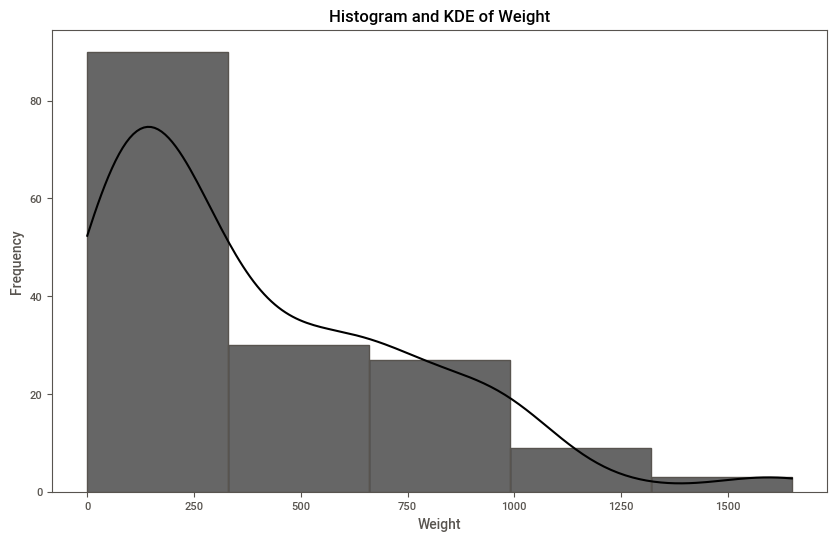

In [9]:
#plotting distribution of weight within the dataset
cor_matrix_plot = df['Weight']

#plot
plt.figure(figsize=(10, 6))
sn.histplot(cor_matrix_plot, kde=True, color='black', bins=5, alpha=0.6)
plt.title('Histogram and KDE of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

Analysis of histogram and kde of weight
- Distribution shape
   - Right skewed(positively skewed)

- Frequence
   - Highest frequence observed is between 0-250, indicating most samples have low weight
   - as weight increases, the frequency decreases

- Kernel Density Plot
   - The KDE confirms the right skewed nature of the distribution, with a peak in the lower weight values and the long tail extending towards higher weight

- Insights
   - Right skewedness suggests that there are more samples that has lower weight than higher weight
   - dominant weight range: 0-250 grams
   - Long tail

🛠 Phase 3: Data Preparation
 🏗 Feature Selection and Engineering
- ✨ Select features to include in the model

 🧼 Data Cleaning for Modeling
- 🧹 Drop duplicate information
- 💧 Correct/impute missing values (only for EDA, not modeling)
- 🧽 Fix inconsistencies within columns
- 🔍 Ensure correct data types for each column
  - 🔢 Numeric columns stored as numeric data types
  - 🔄 Convert string/categorical features into numeric features for machine learning

In [10]:
#Removing spaces before the column names
df.columns = [col.strip() for col in df.columns]
print(df.columns)

#dropping duplis
df.drop_duplicates(inplace=True)
print(f'\nNumber of duplicates: {df.duplicated().sum()}')

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

Number of duplicates: 0


In [11]:
#create a function to check unique values

def check_column_vals(df):
    print('Checking all columns for issues')

    #check species
    print('\nThese are the unique values of Species column:')
    print(df['Species'].unique())

    #check Weight
    print('\nThese are the unique values of Weight column:')
    print(df['Weight'].unique())

    #check Length1
    print('\nThese are the unique values of Length1 column:')
    print(df['Length1'].unique())

    #check Length2
    print('\nThese are the unique values of Length2 column:')
    print(df['Length2'].unique())

    #check Length3
    print('\nThese are the unique values of Length3 column:')
    print(df['Length3'].unique())

    #check Height
    print('\nThese are the unique values of Height column:')
    print(df['Height'].unique())

    #check Width
    print('\nThese are the unique values of Width column:')
    print(df['Width'].unique())

    print('\nSummary Statistics')
    print(df.describe())

check_column_vals(df)

Checking all columns for issues

These are the unique values of Species column:
['Bream' 'Beam' 'Roach' nan 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']

These are the unique values of Weight column:
[ 242.   290.   340.   363.   430.   450.   500.   390.   475.   600.
  700.   610.   650.   575.   685.   620.   680.   725.   720.   714.
  850.  1000.   920.   955.   925.   975.   950.    40.    69.    78.
   87.   120.     0.   110.   150.   145.   160.   140.   169.   161.
  200.   180.   272.   270.   306.   540.   800.    55.    60.    90.
  170.   273.   300.     5.9   32.    51.5   70.   100.    80.    85.
  115.   125.   130.   135.   225.   188.   197.   218.   260.   265.
  250.   320.   514.   556.   840.   690.   900.   820.  1015.  1100.
  345.   456.   510.   567.   770.  1250.  1600.  1550.  1650.     6.7
    7.5    7.     9.7    9.8    8.7   10.     9.9   12.2   13.4   19.7
   19.9]

These are the unique values of Length1 column:
[23.2 24.  23.9 26.3 26.5 26.8 27.6 28.5 

Inconsistent Values
- Species
    - 'Bream' 'Beam'
- Weight 
    - '0.000'

In [12]:
#correct the species values
correction_species = {
    'Beam':'Bream'
}

df['Species'] = df['Species'].replace(correction_species)

#check species column
print('Unique values in Species column')
print(df['Species'].unique())

Unique values in Species column
['Bream' 'Roach' nan 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [13]:
#get the mean weight
mean_weight = df['Weight'].mean()

df.loc[df['Weight'] == 0, 'Weight'] = mean_weight

#check the minimum weight to ensure 0 was removed
min_weight = df['Weight'].min()
print(f'The minimum weight is {min_weight}')

The minimum weight is 5.9


# Machine Learning

### 3. Define Target and Features 🎯

In [14]:
#define target y and features X
y = df['Weight']
X = df.drop(columns = 'Weight')

#check features
X.columns

Index(['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

### 4. Perform a Train-Test Split ✂️

In [15]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5. Create a ColumnTransformer for Preprocessing
- Use ``ColumnTransformer`` to preprocess Data
   - Impute missing values
   - scaler numeric data
   - one hot encode categorical data



In [16]:
#prepare data by selecting all numeric and object columns 
num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_include='object')

In [17]:
#isntantiate transformers
scaler = StandardScaler()

ohe = OneHotEncoder(handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')


### 6. Create a Model Pipeline 🧩
- Combine the `ColumnTransformer` with a machine learning model (e.g. ``Linear Regression Model``) to form a pipeline

In [18]:
#create a numeric pipeline 
num_pipe = make_pipeline(mean_imputer, scaler)

# create a categorical pipeline for the categorical columns and the freq imputer and one hot encoder
cat_pipe = make_pipeline(freq_imputer, ohe)


In [19]:
num_tuple = (num_pipe, num_cols)
cat_tuple = (cat_pipe, cat_cols)

In [20]:
#create column transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, num_cols),
        ('cat', cat_pipe, cat_cols) 
    ],remainder='drop')

### 7. Build and Fit the Model Pipeline on the Training Data and Make Predictions 🚂

**MODEL 1. Linear Regression Model**

In [21]:
#import libraries
from sklearn.linear_model import LinearRegression

#metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#create functions that takes true and predicted values as arguments
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R2: {r2:.2f}')

In [22]:
# Create the linear regression model
linear_reg = LinearRegression()

linear_reg_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', linear_reg),
    ])

#fitr the pipeline on the training data
linear_reg_pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000147D188DF60>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000147D24C1120>)])),
                ('regressor', LinearRegression())])

In [23]:
# find MAE, MSE, RMSE, and R2 on the regression model for both the train and test data
print('Train Evaluation')
evaluate_model(y_train, linear_reg_pipe.predict(X_train))
print('\nTest Evaluation')
evaluate_model(y_test, linear_reg_pipe.predict(X_test))

Train Evaluation
MAE: 75.43
MSE: 11241.82
RMSE: 106.03
R2: 0.91

Test Evaluation
MAE: 66.24
MSE: 8072.52
RMSE: 89.85
R2: 0.94


## Model Evaluation

### Train Evaluation
- **Mean Absolute Error (MAE):** 75.43
  - This indicates that, on average, the model's predictions are off by about 75.43 units from the actual values on the training data.

- **Mean Squared Error (MSE):** 11241.82
  - This measures the average squared difference between the predicted and actual values. Higher values indicate larger errors, but because it squares the differences, it also penalizes larger errors more.

- **Root Mean Squared Error (RMSE):** 106.03
  - This is the square root of MSE and provides an error metric in the same units as the target variable. It indicates that the average deviation of predictions from actual values is about 106.03 grams.

- **R-squared (R2):** 0.91
  - This indicates that 91% of the variance in the training data is explained by the model. A value closer to 1 means the model explains a high proportion of the variance.

### Test Evaluation
- **Mean Absolute Error (MAE):** 66.24
  - On average, the model's predictions are off by about 66.24 units from the actual values on the test data, which is slightly better than the training data.

- **Mean Squared Error (MSE):** 8072.52
  - This indicates the average squared difference between predicted and actual values on the test data, which is lower than the training MSE, suggesting the model performs well on unseen data.

- **Root Mean Squared Error (RMSE):** 89.85
  - The average deviation of predictions from actual values on the test data is about 89.85 grams, which is also better than the training RMSE.

- **R-squared (R2):** 0.94
  - This indicates that 94% of the variance in the test data is explained by the model, which is even better than the training R2, suggesting that the model generalizes well to new data.

### Summary
- The model performs well on both the training and test data, with high R-squared values *indicating it explains most of the variance in the data*.
- The lower MAE, MSE, and RMSE on the test data compared to the training data suggest *the model is not overfitting and generalizes well to unseen data*.


**MODEL 2. Logistic Regression Model**

In [25]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=100, random_state=42)

etr_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', etr),
    ])

#train the model
etr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000147D188DF60>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000147D24C1120>)])),
                ('regressor', ExtraTreesRegressor(random_state=42))])

In [26]:
print('Extra Trees Regression Model')
print('Train Evaluation')
evaluate_model(y_train, etr_pipe.predict(X_train))
print('\nTest Evaluation')
evaluate_model(y_test, etr_pipe.predict(X_test))
print("\n")

Extra Trees Regression Model
Train Evaluation
MAE: 0.39
MSE: 9.84
RMSE: 3.14
R2: 1.00

Test Evaluation
MAE: 43.76
MSE: 4543.01
RMSE: 67.40
R2: 0.97




In [29]:
etr.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [31]:
# fit the decision tree pipeline on the training data
etr_pipe.fit(X_train, y_train)

#getting the current settings of the hyperparameters
regressor = etr_pipe.named_steps['regressor']
n_estimators = regressor.n_estimators
max_depth = regressor.max_depth
min_samples_leaf = regressor.min_samples_leaf
min_samples_split = regressor.min_samples_split
max_features = regressor.max_features
max_leaf_nodes = regressor.max_leaf_nodes
print('Current model settings:')
print(f'n_estimators: {n_estimators}')
print(f'max_depth: {max_depth}')
print(f'min_samples_leaf: {min_samples_leaf}')
print(f'min_samples_split: {min_samples_split}')
print(f'max_features: {max_features}')
print(f'max_leaf_nodes: {max_leaf_nodes}')

Current model settings:
n_estimators: 100
max_depth: None
min_samples_leaf: 1
min_samples_split: 2
max_features: 1.0
max_leaf_nodes: None


In [32]:
depths = range(1, 20, 2) #can adjust the range as needed

#create a dataframe to store the train and test scores
scores = pd.DataFrame(columns=['Train', 'Test'], index=depths)

#loop over the values in depths 
for n in depths:
    # fit a new model with max depth of n
    extra_tree = ExtraTreesRegressor(max_depth=n, random_state=42)

    #create a new model pipeline for etr
    extra_tree_pipe = Pipeline(
        steps=[
        ('preprocessor', preprocessor),
        ('regressor', extra_tree),
    ])
    
    #fit the pipeline on the training data
    extra_tree_pipe.fit(X_train, y_train)

    #create a prediction array
    train_pred = extra_tree_pipe.predict(X_train)
    test_pred = extra_tree_pipe.predict(X_test)

    #evaluate the model using R2 Score
    train_r2score = r2_score(y_train, train_pred)
    test_r2score = r2_score(y_test, test_pred)

    #record the prediction results in the score dataframe
    scores.loc[n, 'Train'] = train_r2score
    scores.loc[n, 'Test'] = test_r2score

# display the scores in the dataframe
scores


,Train,Test
1,0.720983,0.747564
3,0.958413,0.922487
5,0.984657,0.956965
7,0.995494,0.962916
9,0.99938,0.972681
11,0.999891,0.969693
13,0.999918,0.970971
15,0.999919,0.969228
17,0.999919,0.968061
19,0.999919,0.968061


In [33]:
#sort the data frame by test scores and save the index (k) of the best score
best_depth = scores.sort_values(by='Test', ascending=False).index[0]
print(f'Best Depth: {best_depth}')

Best Depth: 9


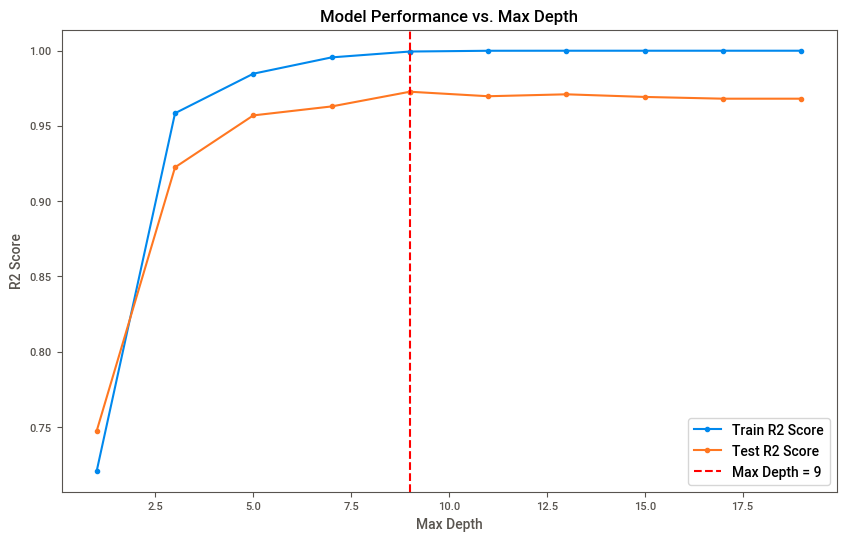

In [35]:
# plot the train and test scores to visualize the performance
plt.figure(figsize=(10, 6))
plt.plot(scores.index, scores['Train'], label='Train R2 Score', marker='o')
plt.plot(scores.index, scores['Test'], label='Test R2 Score', marker='o')

# add an indicator at best depth
plt.axvline(x=best_depth, color='r', linestyle='--', label='Max Depth = 9')
plt.scatter(best_depth, scores.loc[best_depth, 'Train'], color='r')
plt.scatter(best_depth, scores.loc[best_depth, 'Test'], color='r')

plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.title('Model Performance vs. Max Depth')
plt.legend()
plt.grid(False)
plt.show()

In [42]:
#instantiate the decision tree regressor model with the best depth
best_extra_trees = ExtraTreesRegressor()

# insert the model into the pipeline
best_extra_trees_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', best_extra_trees),
    ])
# fit the pipeline on the trainig data
best_extra_trees_pipe.fit(X_train, y_train)

# find MAE, MSE, RMSE, and R2 on the regression model for both the train and test data

print('Best Extra Trees Model Train Evaluation')
evaluate_model(y_train, best_extra_trees_pipe.predict(X_train))
print('\nBest Extra Trees Model Test Evaluation')
evaluate_model(y_test, best_extra_trees_pipe.predict(X_test))

Best Extra Trees Model Train Evaluation
MAE: 0.39
MSE: 9.84
RMSE: 3.14
R2: 1.00

Best Extra Trees Model Test Evaluation
MAE: 42.52
MSE: 3990.57
RMSE: 63.17
R2: 0.97


### Comparing Both Models

In [37]:
#create a function to print bothj model results
def evaluate_model_on_data(model, X_train, y_train, X_test, y_test, evaluate_model):
    print('Evaluation on Training Data:')
    evaluate_model(y_train, model.predict(X_train))
    
    print('Evaluation on Test Data:')
    evaluate_model(y_test, model.predict(X_test))

In [41]:
print('Linear Regression Model Results')
evaluate_model_on_data(linear_reg_pipe, X_train, y_train, X_test, y_test, evaluate_model)

print('\nBest Extra Trees Model Model Results')
evaluate_model_on_data(best_extra_trees_pipe, X_train, y_train, X_test, y_test, evaluate_model)

Linear Regression Model Results
Evaluation on Training Data:
MAE: 75.43
MSE: 11241.82
RMSE: 106.03
R2: 0.91
Evaluation on Test Data:
MAE: 66.24
MSE: 8072.52
RMSE: 89.85
R2: 0.94

Best Extra Trees Model Model Results
Evaluation on Training Data:
MAE: 0.39
MSE: 9.84
RMSE: 3.14
R2: 1.00
Evaluation on Test Data:
MAE: 40.29
MSE: 3625.97
RMSE: 60.22
R2: 0.97


## Evaluation of Important Metrics: RMSE and R²

### Linear Regression Model Results

**Training Data:**
- Significant average deviation of predictions from actual values.
- Explains 91% of the variance in the data.

**Test Data:**
- Good generalization with lower deviation.
- Explains 94% of the variance in the data.

### Best Extra Trees Model Results

**Training Data:**
- Extremely close fit with very low deviation.
- Nearly all variance explained, indicating overfitting.

**Test Data:**
- The Extra Trees model outperforms the Linear Regression model in both RMSE and R².

**Summary**
- **Extra Trees Model**: Better prediction accuracy and variance explanation, but potential overfitting needs to be addressed.
- **Linear Regression Model**: Good generalization with stable performance, but higher errors compared to the Extra Trees model.